<IPython.core.display.Javascript object>


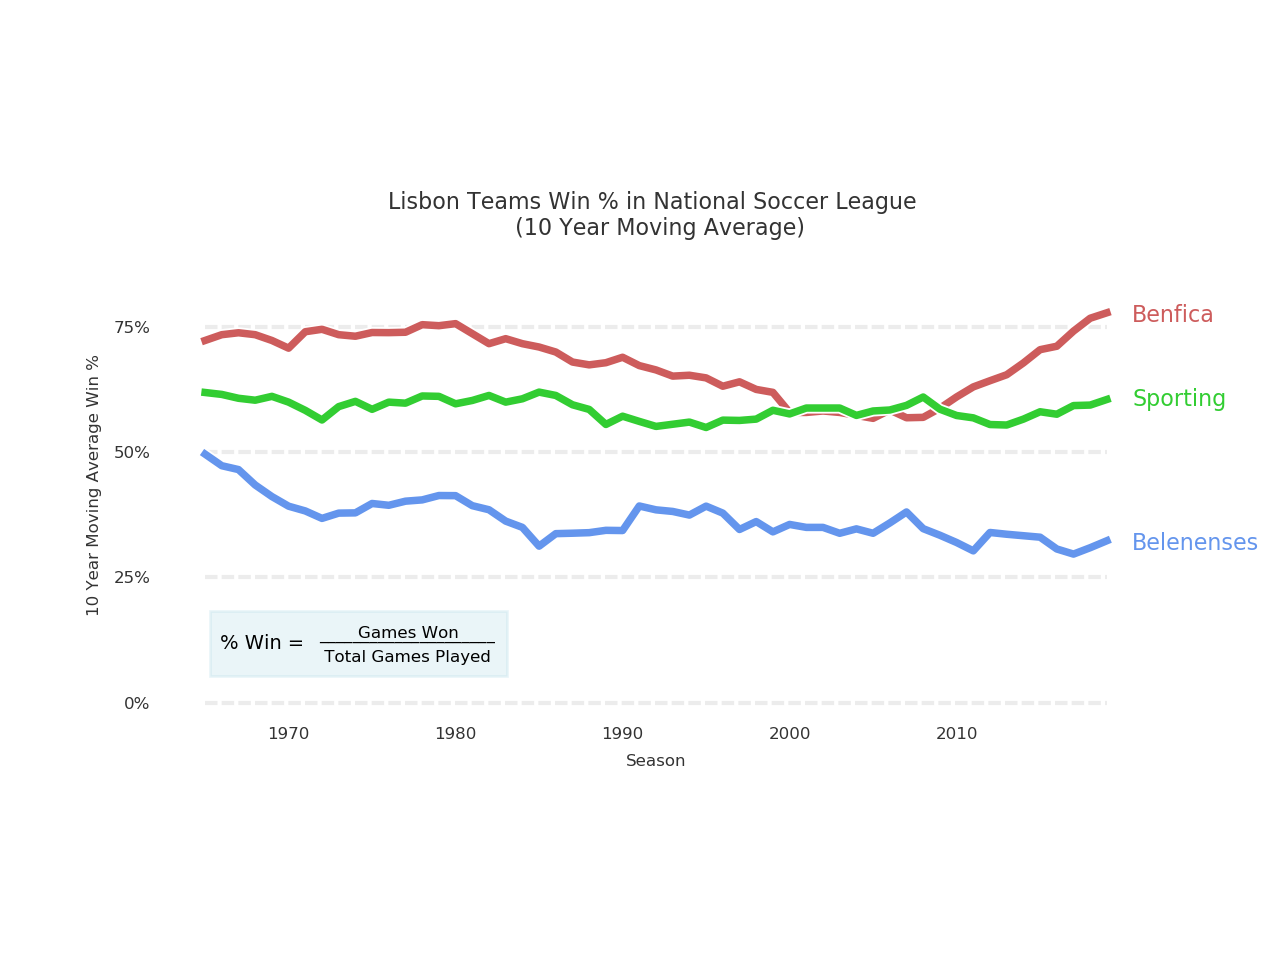

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.patches as patches
%matplotlib notebook

# Read Data from Excel file generated from Internet Sources
df = pd.read_excel('//Users/joaoeira/Desktop/Data_League.xlsx')

#Calculate Win%, clean Dataframe and calculate moving average
df['Win %']=df['V']/df['GP']
df_answer=df.pivot(index='Season',columns='Club',values='Win %')
df_answer.index= [x.strip() for x in df_answer.index]
df_answer['Benfica']= df_answer['Benfica'].rolling(window=10).mean()*100
df_answer['Sporting']= df_answer['Sporting'].rolling(window=10).mean()*100
df_answer['Belenenses']= df_answer['Belenenses'].rolling(window=10,min_periods=8).mean()*100
df_answer=df_answer[df_answer.index>'1964/1965'].sort_index()

#Call Figure
fig, ax = plt.subplots()

#Remove Figure Borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Create Title and Axis Labels    
plt.title('Lisbon Teams Win % in National Soccer League \n (10 Year Moving Average)',
          fontsize=8,color='black',alpha=0.8)
plt.ylabel('10 Year Moving Average Win %',rotation=90,fontsize=6,alpha=0.8)
plt.xlabel('Season',fontsize=6,alpha=0.8)

#Plot Data Series for the 3 Clubs
plt.plot(df_answer['Benfica'],'indianred',df_answer['Sporting'],'limegreen',df_answer['Belenenses'],'cornflowerblue',
         lw=2.7,alpha=1,path_effects=[pe.Stroke(linewidth=4, foreground='w'), pe.Normal()])

#Plot Horizontal lines
plt.hlines([0,25,50,75],'1965/1966' , '2019/2020', colors='grey', linestyles=(0, (3, 1)),alpha=0.15)

#Plot infoBox showing formula for % Win
props = dict(boxstyle='square', facecolor='lightblue', alpha=0.2)
ax.text(0.06,0.16, '% Win =',fontsize=7,transform=ax.transAxes,verticalalignment='center')
ax.text(0.20,0.18, 'Games Won',fontsize=6,transform=ax.transAxes,verticalalignment='center')
ax.text(0.16,0.16, '_____________________',fontsize=6,transform=ax.transAxes,verticalalignment='bottom')
ax.text(0.16,0.13, ' Total Games Played',fontsize=6,transform=ax.transAxes,verticalalignment='center')
ax.text(0.06,0.16,"",transform=ax.transAxes,verticalalignment='center',bbox=props)

# build a rectangle in axes coords
left, width = .05, .3
bottom, height = .09, .14
right = left + width
top = bottom + height
p = patches.Rectangle((left, bottom), width, height, fill=True, transform=ax.transAxes,
                      clip_on=False,color='lightblue',alpha=0.25)
ax.add_patch(p)


#Set Labels for Series
ax.text(0.98,0.85, 'Benfica',fontsize=8,color='indianred',transform=ax.transAxes)
ax.text(0.98,0.67, 'Sporting',fontsize=8,color='limegreen',transform=ax.transAxes)
ax.text(0.98,0.36, 'Belenenses',fontsize=8,color='cornflowerblue',transform=ax.transAxes)

#Configure x and y Axis and Labels
myticklocation_x=[ '1970/1971','1980/1981','1990/1991', '2000/2001','2010/2011']
myticklabels_x=['1970','1980', '1990', '2000', '2010']
myticklocation_y=[0,25, 50,75]
myticklabels_y=['0%','25%','50%', '75%']
ax.get_xaxis().set_ticks(myticklocation_x)
ax.set_xticklabels(myticklabels_x,fontsize=6,alpha=0.8)
ax.get_yaxis().set_ticks(myticklocation_y)
ax.set_yticklabels(myticklabels_y,fontsize=6,alpha=0.8)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim(-3, 90) 



#Set Aspect Ratio of Figure
ax.set_aspect(0.3)

#Show Figure                    
plt.show()
